# Lab 8

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
import warnings
from sklearn.tree import DecisionTreeClassifier
from itertools import combinations
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

## Problem 1

### Part 1

In [2]:
dataset = pd.read_csv(r"D:\IIT Jodhpur CSE\IV SEMESTER II YEAR\PRML\Lab8\train.csv\train2.csv")
dataset

id  Gender      Customer Type  Age   Type of Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
103899   94171  Female  disloyal Customer   23  Business travel       Eco   
103900   73097    Male     Loyal Customer   49  Business travel  Business   
103901   68825    Male  disloyal Customer   30  Business travel  Business   
103902   54173  Female  disloyal Customer   22  Business travel       Eco   
103903   62567    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
103899                                  1                       2  ...   
103900                                  4                       4  ...   
103901                                  1                       1  ...   
103902                                  1                       1  ...   
103903                                  3                       3  ...   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
103899                 4                2                 3            2   
103900                 5                5                 5            4   
103901                 4                5                 5            4

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [3]:
X = dataset.drop("satisfaction",axis = 1)
Y = dataset["satisfaction"]

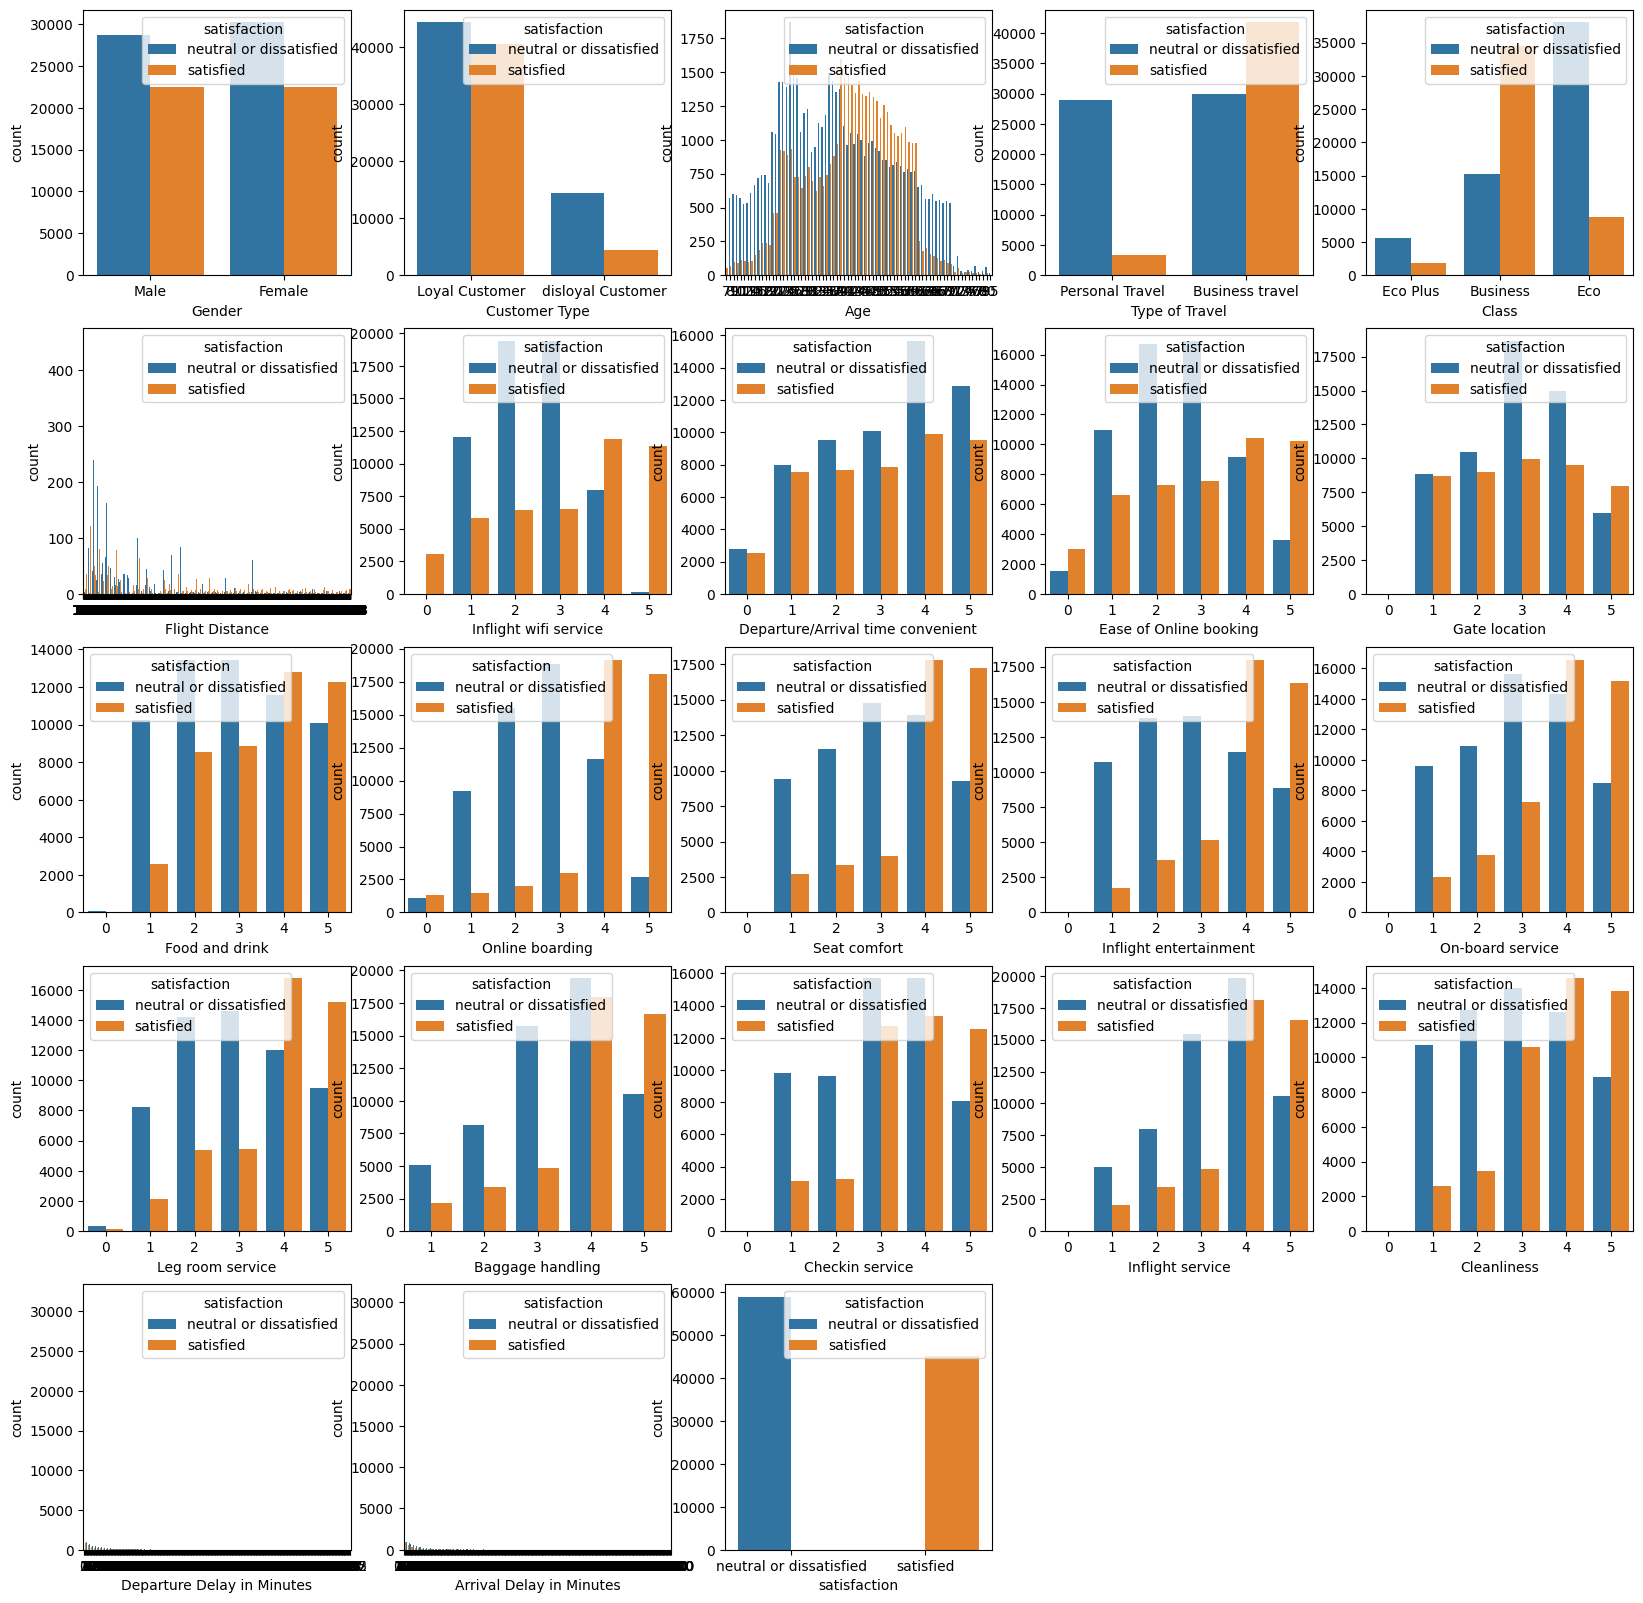

In [21]:
fig = plt.figure(figsize = (20,20))
cnt = 1
for i in dataset.columns[1:]:
  ax = fig.add_subplot(5,5,cnt)
  sns.countplot(data = dataset,x = i,hue = "satisfaction",ax =ax)
  cnt += 1
plt.show()

<AxesSubplot: >

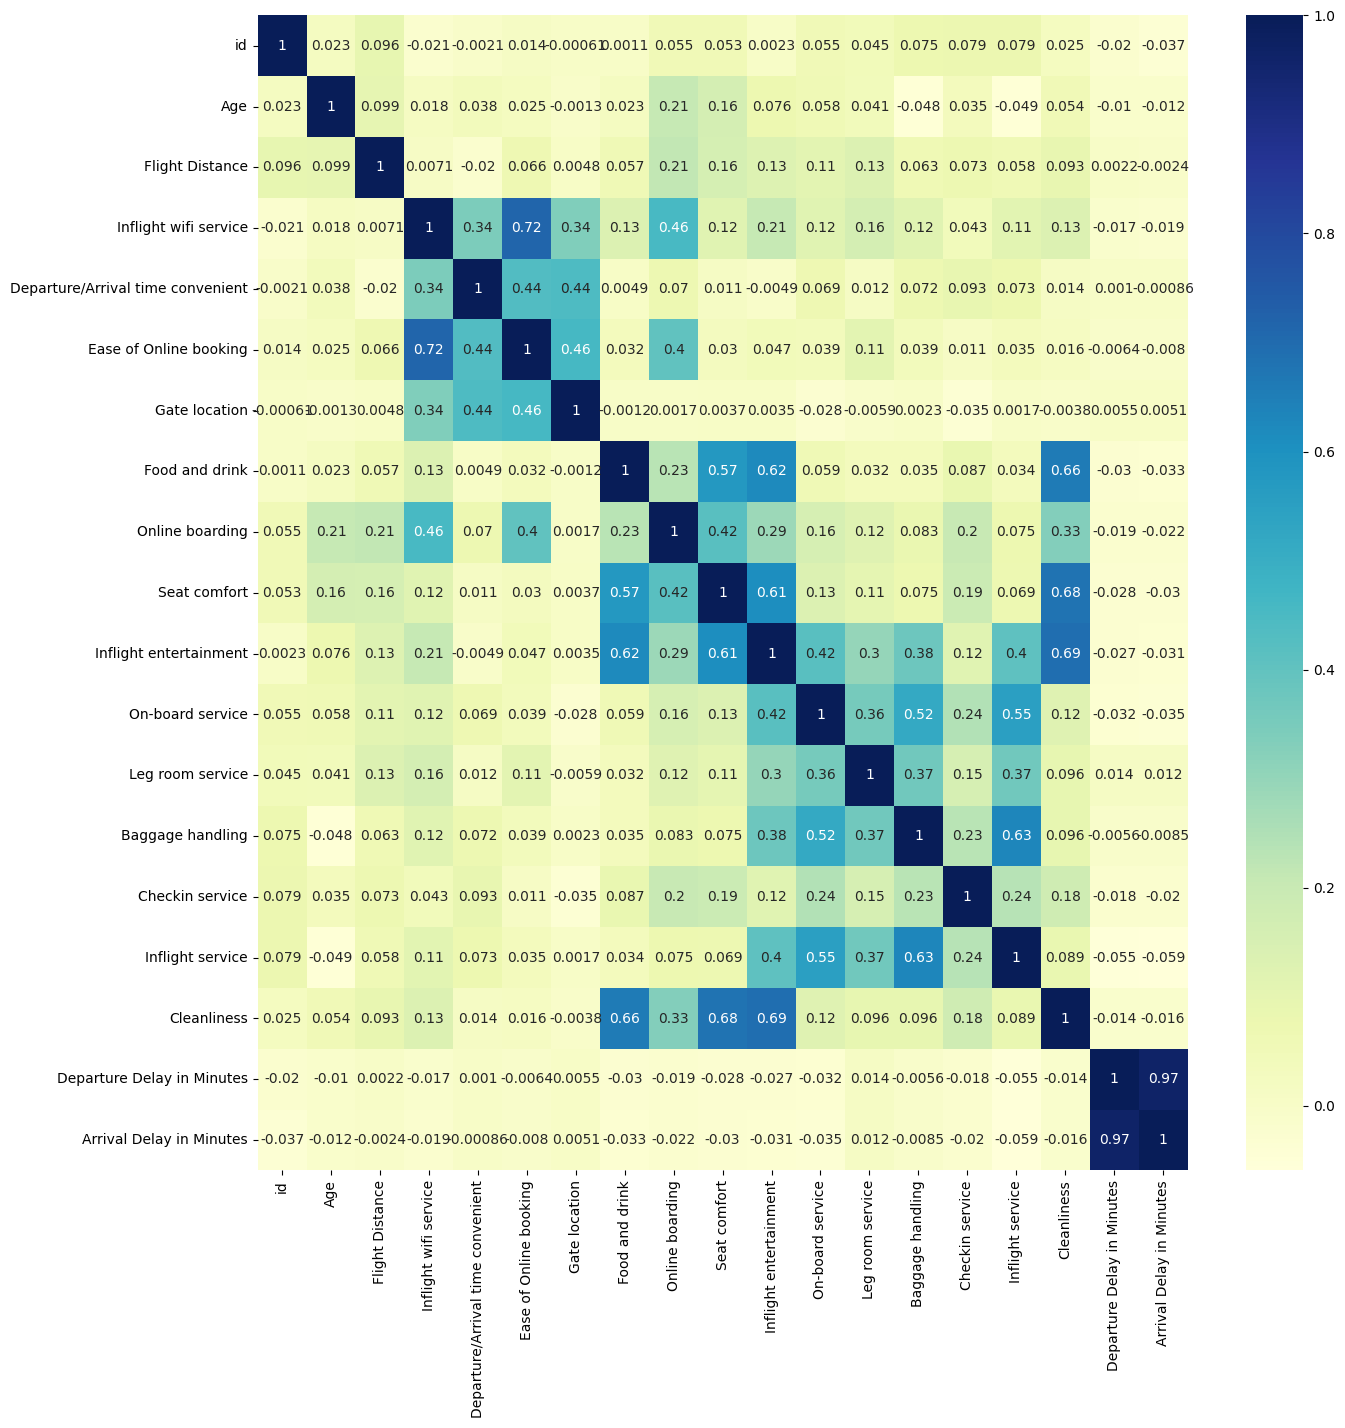

In [22]:
plt.rcParams["figure.figsize"] = (15,15)
sns.heatmap(dataset.corr(),annot =True,cmap = 'YlGnBu')

### Preprocessing

In [4]:
X = dataset.drop("satisfaction",axis = 1)
Y = dataset["satisfaction"]
X

id  Gender      Customer Type  Age   Type of Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
103899   94171  Female  disloyal Customer   23  Business travel       Eco   
103900   73097    Male     Loyal Customer   49  Business travel  Business   
103901   68825    Male  disloyal Customer   30  Business travel  Business   
103902   54173  Female  disloyal Customer   22  Business travel       Eco   
103903   62567    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
103899                                  1                       2  ...   
103900                                  4                       4  ...   
103901                                  1                       1  ...   
103902                                  1                       1  ...   
103903                                  3                       3  ...   

        Seat comfort  Inflight entertainment  On-board service  \
0                  5                       5                 4   
1                  1                       1                 1   
2                  5                       5                 4   
3                  2                       2                 2   
4                  5                       3                 3   
...              ...                     ...               ...   
103899             2                       2                 3   
103900             5                       5                 5   
103901             5                       4                 3   
103902             1                       1                 4   
103903             1                       1                 1   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
0                      3                 4                4                 5   
1                      5                 3                1                 4   
2                      3                 4                4                 4   
3                      5                 3                1                 4   
4                      4                 4                3                 3   
...                  ...               ...              ...               ...   
103899                 1                 4                2                 3   
103900                 5                 5                5                 5   
103901                 2                 4                5                

In [5]:
for i in ["Gender","Customer Type","Type of Travel","Class"]:
  X[i] = LabelEncoder().fit_transform(X[i])
X

id  Gender  Customer Type  Age  Type of Travel  Class  \
0        70172       1              0   13               1      2   
1         5047       1              1   25               0      0   
2       110028       0              0   26               0      0   
3        24026       0              0   25               0      0   
4       119299       1              0   61               0      0   
...        ...     ...            ...  ...             ...    ...   
103899   94171       0              1   23               0      1   
103900   73097       1              0   49               0      0   
103901   68825       1              1   30               0      0   
103902   54173       0              1   22               0      1   
103903   62567       1              0   27               0      0   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
103899                                  1                       2  ...   
103900                                  4                       4  ...   
103901                                  1                       1  ...   
103902                                  1                       1  ...   
103903                                  3                       3  ...   

        Seat comfort  Inflight entertainment  On-board service  \
0                  5                       5                 4   
1                  1                       1                 1   
2                  5                       5                 4   
3                  2                       2                 2   
4                  5                       3                 3   
...              ...                     ...               ...   
103899             2                       2                 3   
103900             5                       5                 5   
103901             5                       4                 3   
103902             1                       1                 4   
103903             1                       1                 1   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
0                      3                 4                4                 5   
1                      5                 3                1                 4   
2                      3                 4                4                 4   
3                      5                 3                1                 4   
4                      4                 4                3                 3   
...                  ...               ...              ...               ...   
103899                 1                 4                2                 3   
103900                 5                 5                5                 5   
103901                 2                 4                5                 5   
103902                 5                 1                5                 4   
103903   

In [6]:
X = X.drop("id",axis = 1)
X.describe()

Gender  Customer Type            Age  Type of Travel  \
count  103904.000000  103904.000000  103904.000000   103904.000000   
mean        0.492541       0.182678      39.379706        0.310373   
std         0.499947       0.386404      15.114964        0.462649   
min         0.000000       0.000000       7.000000        0.000000   
25%         0.000000       0.000000      27.000000        0.000000   
50%         0.000000       0.000000      40.000000        0.000000   
75%         1.000000       0.000000      51.000000        1.000000   
max         1.000000       1.000000      85.000000        1.000000   

               Class  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean        0.594135      1189.448375               2.729683   
std         0.620799       997.147281               1.327829   
min         0.000000        31.000000               0.000000   
25%         0.000000       414.000000               2.000000   
50%         1.000000       843.000000               3.000000   
75%         1.000000      1743.000000               4.000000   
max         2.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  ...   Seat comfort  Inflight entertainment  \
count  103904.000000  ...  103904.000000           103904.000000   
mean        2.976883  ...       3.439396                3.358158   
std         1.277621  ...       1.319088                1.332991   
min         0.000000  ...       0.000000                0.000000   
25%         2.000000  ...       2.000000                2.000000   
50%         3.000000  ...       4.000000                4.000000   
75%         4.000000  ...       5.000000                4.000000   
max         5.000000  ...       5.000000                5.000000   

       On-board service  Leg room service  Baggage handling  Checkin service  \
count     103904.000000     103904.000000     103904.000000    103904.000000   
mean           3.382363          3.351055          3.631833         3.304290   
std            1.288354          1.315605          1.180903         1.265396   
min            0.000000          0.000000          1.000000         0.000000   
25%            2.000000          2.000000          3.000000         3.000000   
50%            4.000000          4.000000          4.000000         3.000000   
75%            4.000000          4.000000          5.000000         4.000000   
max            5.000000          5.000000          5.000000         5.000000   

       Inflight service    Cleanliness  Departure Delay in Minutes  \
count     103904.000000  103904.000000               103904.000000   
mean           3.640428       3.286351                   14.815618   
std            1.175663       1.312273                   38.230901   
min            0.000000       0.000000                    0.000000   
25%            3.000000       2.000000                    0.000000   
50%            4.000000       3.000000                    0.000000   
75%            5.000000       4.000000                   12.000000   
max            5.000000       5.000000                 1592.000000   

       Arrival Delay in Minutes  
count             103594.000000  
mean                  15.178678  
std                   38.698682  
min                    0.000000  
25%                    0.000000  
50%                    0

In [26]:
X.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
dtype: int64

<AxesSubplot: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

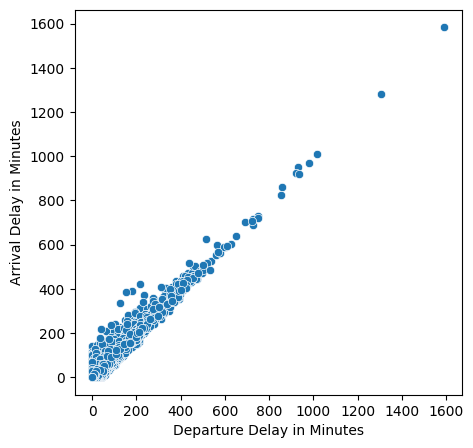

In [27]:
plt.rcParams["figure.figsize"] = (5,5)
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = X)

In [7]:
X = X.drop("Departure Delay in Minutes",axis = 1)
median_val = X['Arrival Delay in Minutes'].median()
X['Arrival Delay in Minutes'] = X['Arrival Delay in Minutes'].fillna(median_val)
X.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Arrival Delay in Minutes             0
dtype: int64

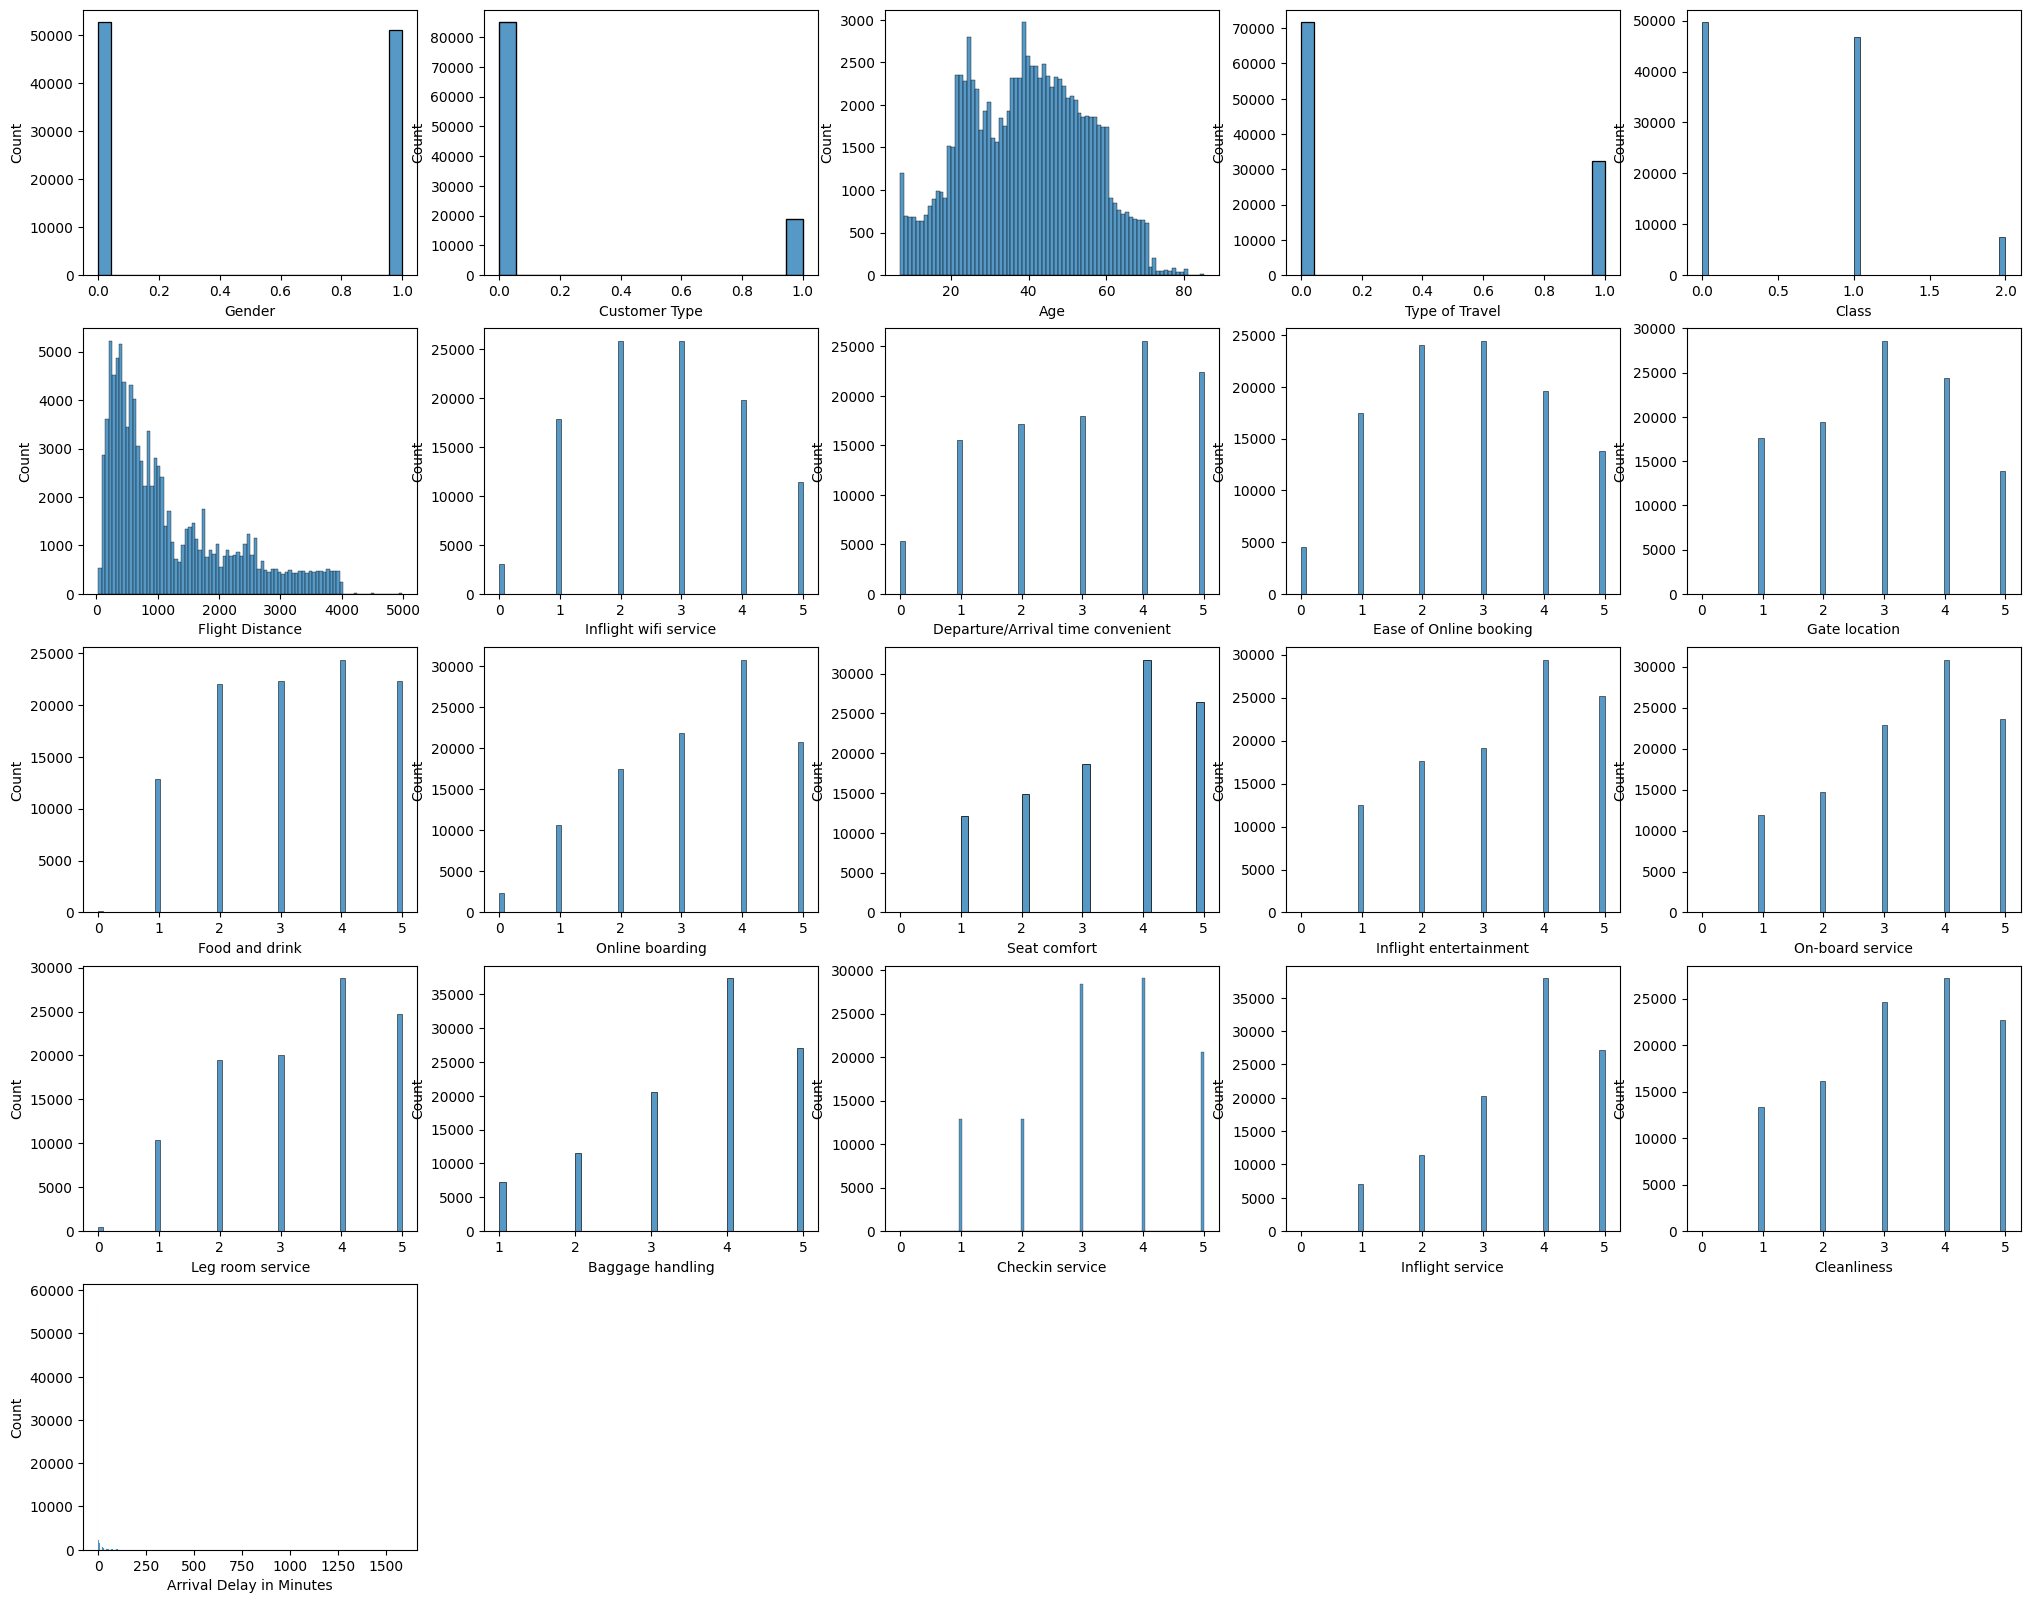

In [29]:
fig = plt.figure(figsize = (25,20))
cnt = 1
for i in X.columns:
  ax = fig.add_subplot(5,5,cnt)
  sns.histplot(X[i])
  cnt += 1
plt.show()

<AxesSubplot: ylabel='Count'>

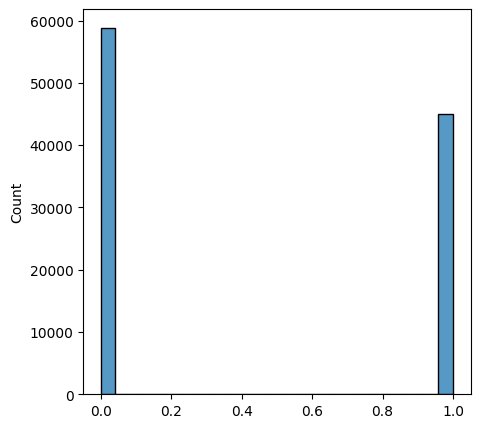

In [30]:
YY = LabelEncoder().fit_transform(Y)
sns.histplot(YY)

In [31]:
X.describe()

Gender  Customer Type            Age  Type of Travel  \
count  103904.000000  103904.000000  103904.000000   103904.000000   
mean        0.492541       0.182678      39.379706        0.310373   
std         0.499947       0.386404      15.114964        0.462649   
min         0.000000       0.000000       7.000000        0.000000   
25%         0.000000       0.000000      27.000000        0.000000   
50%         0.000000       0.000000      40.000000        0.000000   
75%         1.000000       0.000000      51.000000        1.000000   
max         1.000000       1.000000      85.000000        1.000000   

               Class  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean        0.594135      1189.448375               2.729683   
std         0.620799       997.147281               1.327829   
min         0.000000        31.000000               0.000000   
25%         0.000000       414.000000               2.000000   
50%         1.000000       843.000000               3.000000   
75%         1.000000      1743.000000               4.000000   
max         2.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  ...  Online boarding   Seat comfort  \
count  103904.000000  ...    103904.000000  103904.000000   
mean        2.976883  ...         3.250375       3.439396   
std         1.277621  ...         1.349509       1.319088   
min         0.000000  ...         0.000000       0.000000   
25%         2.000000  ...         2.000000       2.000000   
50%         3.000000  ...         3.000000       4.000000   
75%         4.000000  ...         4.000000       5.000000   
max         5.000000  ...         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Arrival Delay in Minutes  
count             103904.000000  
mean                  15.133392  
std                   38.649776  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                   13.000000  
max                 1584.000000  

[8 rows x 21 columns

### Part 2

In [32]:
model = DecisionTreeClassifier(random_state=42)
sfs = SFS(estimator=model,k_features=10,forward=True,floating=False, scoring='accuracy', cv=5) 

sfs.fit(X, Y)

print('Accuracy with all features:',sfs.k_score_)

print('Best 10 features: {}'.format(sfs.k_feature_names_))

Accuracy with all features: 0.9507237505348758
Best 10 features: ('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Baggage handling', 'Inflight service')


### Part 3

In [33]:
sfs = SFS(estimator=model,k_features=10,forward=True,floating=False, scoring='accuracy', cv=4) 

sfs.fit(X, Y)

print('Accuracy with all features:',sfs.k_score_)

print('Best 10 features: {}'.format(sfs.k_feature_names_))

Accuracy with all features: 0.9499441792423776
Best 10 features: ('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Baggage handling', 'Inflight service')


In [34]:
sbs = SFS(estimator=model,k_features=10,forward=False,floating=False, scoring='accuracy', cv=4) 

sbs.fit(X, Y)

print('Accuracy with all features:',sbs.k_score_)

print('Best 10 features: {}'.format(sbs.k_feature_names_))

Accuracy with all features: 0.9486834000615953
Best 10 features: ('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Gate location', 'Online boarding', 'Seat comfort', 'On-board service', 'Baggage handling', 'Inflight service')


In [35]:
sffs = SFS(estimator=model,k_features=10,forward=True,floating=True, scoring='accuracy', cv=4) 

sffs.fit(X, Y)

print('Accuracy with all features:',sffs.k_score_)

print('Best 10 features: {}'.format(sffs.k_feature_names_))

Accuracy with all features: 0.9513396981829381
Best 10 features: ('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Baggage handling', 'Inflight service', 'Cleanliness')


In [36]:
sbfs = SFS(estimator=model,k_features=10,forward=False,floating=True, scoring='accuracy', cv=4) 

sbfs.fit(X, Y)

print('Accuracy with all features:',sbfs.k_score_)

print('Best 10 features: {}'.format(sbfs.k_feature_names_))

Accuracy with all features: 0.9513396981829381
Best 10 features: ('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Baggage handling', 'Inflight service', 'Cleanliness')


### Part 4

In [37]:
models = [sfs,sbs,sffs,sbfs]
model_names = ["Sequential forward selection","Sequential Backward Selection","Sequential Forward Floating Selection","Sequential Backward Floating Selection"]

In [38]:
print('For selector =',model_names[0],':\n')

metric_dict = models[0].get_metric_dict()


df = pd.DataFrame.from_dict(metric_dict, orient='index')
df = df[['feature_idx', 'cv_scores', 'avg_score', 'ci_bound']]

df.rename(columns={'feature_idx': 'Feature Subset',
                  'cv_scores': 'CV Scores',
                  'avg_score': 'Mean CV Score',
                  'ci_bound': 'Std CV Score'}, inplace=True)
df

For selector = Sequential forward selection :



Feature Subset  \
1                                 (11,)   
2                               (3, 11)   
3                            (3, 6, 11)   
4                         (3, 6, 9, 11)   
5                      (1, 3, 6, 9, 11)   
6                  (1, 3, 6, 9, 11, 16)   
7               (1, 3, 4, 6, 9, 11, 16)   
8           (1, 3, 4, 6, 9, 11, 16, 18)   
9       (1, 3, 4, 6, 9, 11, 12, 16, 18)   
10  (1, 3, 4, 6, 9, 11, 12, 13, 16, 18)   

                                            CV Scores  Mean CV Score  \
1   [0.7895364952263628, 0.792231290421928, 0.7930...       0.790383   
2   [0.8483215275639051, 0.8512088081305821, 0.850...       0.849688   
3   [0.8915152448413921, 0.8920157068062827, 0.892...       0.891265   
4   [0.919271635355713, 0.9229673544810595, 0.9223...       0.921735   
5   [0.9277024946104097, 0.9285494302433015, 0.929...       0.928800   
6   [0.9393671080997844, 0.9424468740375731, 0.939...       0.941282   
7   [0.9464120726824762, 0.9486834000615953, 0.948...       0.948260   
8   [0.9496843239913767, 0.9501847859562673, 0.950...       0.950685   
9   [0.9490683708038189, 0.9509162303664922, 0.950...       0.950695   
10  [0.9490683708038189, 0.949607329842932, 0.9496...       0.949944   

    Std CV Score  
1       0.003933  
2       0.001959  
3       0.001961  
4       0.002316  
5       0.001189  
6       0.002875  
7       0.001792  
8       0.001409  
9       0.001717  
10      0.001415

In [39]:
print('For selector =',model_names[1],':\n')

metric_dict = models[1].get_metric_dict()


df = pd.DataFrame.from_dict(metric_dict, orient='index')
df = df[['feature_idx', 'cv_scores', 'avg_score', 'ci_bound']]

df.rename(columns={'feature_idx': 'Feature Subset',
                  'cv_scores': 'CV Scores',
                  'avg_score': 'Mean CV Score',
                  'ci_bound': 'Std CV Score'}, inplace=True)
df

For selector = Sequential Backward Selection :



Feature Subset  \
21  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
20  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...   
19  (0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15...   
18  (1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 1...   
17  (1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, ...   
16  (1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, ...   
15  (1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...   
14  (1, 2, 3, 4, 6, 9, 11, 12, 14, 15, 16, 17, 18,...   
13     (1, 2, 3, 4, 6, 9, 11, 12, 14, 16, 17, 18, 20)   
12         (1, 2, 3, 4, 6, 9, 11, 12, 14, 16, 17, 18)   
11            (1, 3, 4, 6, 9, 11, 12, 14, 16, 17, 18)   
10                (1, 3, 4, 6, 9, 11, 12, 14, 16, 18)   

                                            CV Scores  Mean CV Score  \
21  [0.9444102248229135, 0.9459116107175854, 0.945...       0.946008   
20  [0.9454881429011395, 0.945218663381583, 0.9463...       0.946556   
19  [0.945757622420696, 0.9466045580535879, 0.9453...       0.946518   
18  [0.9444102248229135, 0.9468740375731445, 0.946...       0.946605   
17  [0.9457961194949184, 0.9483754234678164, 0.944...       0.946951   
16  [0.9465275639051433, 0.9465660609793656, 0.943...       0.946181   
15  [0.9463735756082537, 0.946181090237142, 0.9442...       0.946518   
14  [0.944256236526024, 0.9453726516784724, 0.9461...       0.945738   
13  [0.9444872189713581, 0.9454496458269172, 0.944...       0.945257   
12  [0.9444872189713581, 0.9454496458269172, 0.942...       0.944920   
11  [0.944371727748691, 0.9461425931629196, 0.9447...       0.945373   
10  [0.947259008315368, 0.9495303356944872, 0.9492...       0.948683   

    Std CV Score  
21      0.002028  
20      0.002520  
19      0.001829  
18      0.002370  
17      0.002617  
16      0.002534  
15      0.002864  
14      0.001730  
13      0.000955  
12      0.002250  
11      0.001288  
10      0.001397

In [40]:
print('For selector =',model_names[2],':\n')

metric_dict = models[2].get_metric_dict()


df = pd.DataFrame.from_dict(metric_dict, orient='index')
df = df[['feature_idx', 'cv_scores', 'avg_score', 'ci_bound']]

df.rename(columns={'feature_idx': 'Feature Subset',
                  'cv_scores': 'CV Scores',
                  'avg_score': 'Mean CV Score',
                  'ci_bound': 'Std CV Score'}, inplace=True)
df

For selector = Sequential Forward Floating Selection :



Feature Subset  \
1                                  (11,)   
2                                (3, 11)   
3                             (3, 6, 11)   
4                          (3, 6, 9, 11)   
5                       (1, 3, 6, 9, 11)   
6                   (1, 3, 6, 9, 11, 16)   
7                (1, 3, 4, 6, 9, 11, 16)   
8            (1, 3, 4, 6, 9, 11, 16, 18)   
9       (1, 3, 4, 6, 11, 12, 13, 16, 18)   
10  (1, 3, 4, 6, 11, 12, 13, 16, 18, 19)   

                                            CV Scores  Mean CV Score  \
1   [0.7895364952263628, 0.792231290421928, 0.7930...       0.790383   
2   [0.8483215275639051, 0.8512088081305821, 0.850...       0.849688   
3   [0.8915152448413921, 0.8920157068062827, 0.892...       0.891265   
4   [0.919271635355713, 0.9229673544810595, 0.9223...       0.921735   
5   [0.9277024946104097, 0.9285494302433015, 0.929...       0.928800   
6   [0.9393671080997844, 0.9424468740375731, 0.939...       0.941282   
7   [0.9464120726824762, 0.9486834000615953, 0.948...       0.948260   
8   [0.9496843239913767, 0.9501847859562673, 0.950...       0.950685   
9   [0.9504157684016015, 0.9506082537727133, 0.950...       0.950878   
10  [0.9511087157376039, 0.9508007391438251, 0.950...       0.951340   

    Std CV Score  
1       0.003933  
2       0.001959  
3       0.001961  
4       0.002316  
5       0.001189  
6       0.002875  
7       0.001792  
8       0.001409  
9       0.001498  
10      0.001341

In [41]:
print('For selector =',model_names[3],':\n')

metric_dict = models[3].get_metric_dict()


df = pd.DataFrame.from_dict(metric_dict, orient='index')
df = df[['feature_idx', 'cv_scores', 'avg_score', 'ci_bound']]

df.rename(columns={'feature_idx': 'Feature Subset',
                  'cv_scores': 'CV Scores',
                  'avg_score': 'Mean CV Score',
                  'ci_bound': 'Std CV Score'}, inplace=True)
df

For selector = Sequential Backward Floating Selection :



Feature Subset  \
21  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
20  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...   
19  (0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15...   
18  (1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 1...   
17  (1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, ...   
16  (1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, ...   
15  (1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...   
14  (1, 3, 4, 6, 7, 9, 11, 12, 13, 14, 16, 17, 18,...   
13     (1, 3, 4, 6, 7, 9, 11, 12, 13, 14, 16, 18, 19)   
12        (1, 3, 4, 6, 9, 11, 12, 13, 14, 16, 18, 19)   
11           (1, 3, 4, 6, 11, 12, 13, 14, 16, 18, 19)   
10               (1, 3, 4, 6, 11, 12, 13, 16, 18, 19)   

                                            CV Scores  Mean CV Score  \
21  [0.9444102248229135, 0.9459116107175854, 0.945...       0.946008   
20  [0.9454881429011395, 0.945218663381583, 0.9463...       0.946556   
19  [0.945757622420696, 0.9466045580535879, 0.9453...       0.946518   
18  [0.9444102248229135, 0.9468740375731445, 0.946...       0.946605   
17  [0.9457961194949184, 0.9483754234678164, 0.944...       0.946951   
16  [0.9465275639051433, 0.9465660609793656, 0.943...       0.946181   
15  [0.9463735756082537, 0.946181090237142, 0.9442...       0.946518   
14  [0.9454111487526948, 0.9448721897135818, 0.945...       0.946325   
13  [0.9469125346473668, 0.9484909146904835, 0.946...       0.947654   
12  [0.9466430551278103, 0.9488758854327071, 0.948...       0.948125   
11  [0.9484139205420388, 0.9496458269171543, 0.950...       0.949781   
10  [0.9511087157376039, 0.9508007391438251, 0.950...       0.951340   

    Std CV Score  
21      0.002028  
20      0.002520  
19      0.001829  
18      0.002370  
17      0.002617  
16      0.002534  
15      0.002864  
14      0.002671  
13      0.001809  
12      0.001419  
11      0.001402  
10      0.001341

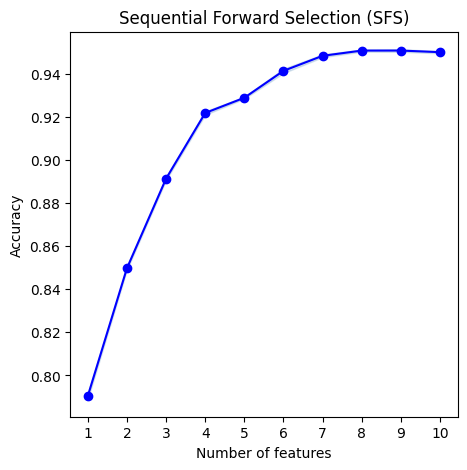

In [45]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (SFS)')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show()

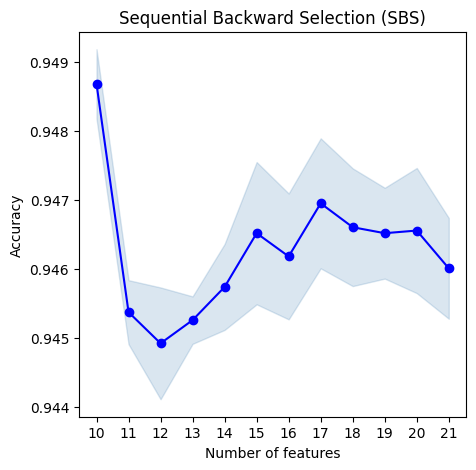

In [46]:
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection (SBS)')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show()

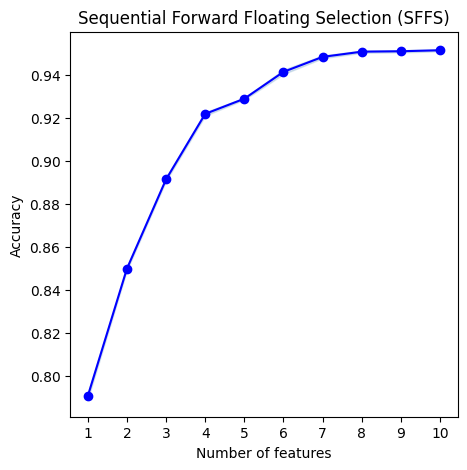

In [47]:
fig = plot_sfs(sffs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Floating Selection (SFFS)')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show()

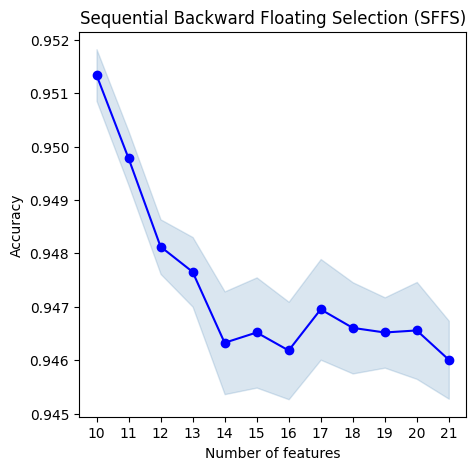

In [48]:
fig = plot_sfs(sbfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Floating Selection (SFFS)')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show()

### Part 5

In [23]:
def decision_tree_accuracy(X, y):
    
    clf = DecisionTreeClassifier(random_state=0)
    
    accuracy = cross_val_score(clf, X, y, cv=5).mean()
    return accuracy

def svm_accuracy(X, y):

    clf = SVC(kernel='linear', random_state=0)
    
    accuracy = cross_val_score(clf, X, y, cv=5).mean()
    return accuracy

In [22]:
def angular_separation_distance(X, y):
    # Compute the angular separation between all pairs of samples
    cos_sim = np.dot(X, X.T) / (np.linalg.norm(X, axis=1)[:, None] * np.linalg.norm(X, axis=1))
    cos_sim = np.clip(cos_sim, -1, 1)  # Clip to avoid numerical errors
    angle = np.arccos(cos_sim)
    
    # Use the 3 nearest neighbors to classify each sample
    clf = KNeighborsClassifier(n_neighbors=3, metric='precomputed')
    accuracy = cross_val_score(clf, angle, y, cv=5).mean()
    return accuracy

In [16]:
def bi_directional_feature_set_generation(X, y, similarity_measure):
    current_feature_set = set(range(X.shape[1]))
    best_feature_set = current_feature_set.copy()
    best_accuracy = 0

    while True:
   
        for i in range(X.shape[1]):
            if i not in current_feature_set:
                feature_set = current_feature_set | {i}
                accuracy = similarity_measure(X[:, list(feature_set)], y)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_feature_set = feature_set


        for i in range(X.shape[1]):
            if i in current_feature_set:
                feature_set = current_feature_set - {i}
                accuracy = similarity_measure(X[:, list(feature_set)], y)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_feature_set = feature_set

  
        if best_feature_set == current_feature_set:
            break


        current_feature_set = best_feature_set

    return len(list(current_feature_set)), best_accuracy

In [24]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif

def angular_separation_distance(X, y, current_feature_set):
    # Compute the pairwise angular separation between samples
    # using the cosine similarity
    X_norm = np.linalg.norm(X[:, list(current_feature_set)], axis=1)
    cos_sim = X[:, list(current_feature_set)].dot(X[:, list(current_feature_set)].T) / (X_norm[:, None] * X_norm)
    angular_sep = np.arccos(cos_sim)
    
    # Use the 3 nearest neighbors to classify each sample
    clf = KNeighborsClassifier(n_neighbors=3)
    accuracy = cross_val_score(clf, angular_sep, y, cv=5).mean()
    
    return accuracy

def euclidean_distance(X, y, current_feature_set):
    # Compute the pairwise Euclidean distance between samples
    dist = np.sqrt(np.sum((X[:, list(current_feature_set)] - X[:, list(current_feature_set)].T) ** 2, axis=2))
    
    # Use the 3 nearest neighbors to classify each sample
    clf = KNeighborsClassifier(n_neighbors=3)
    accuracy = cross_val_score(clf, dist, y, cv=5).mean()
    
    return accuracy

def city_block_distance(X, y, current_feature_set):
    # Compute the pairwise city-block distance between samples
    dist = np.abs(X[:, list(current_feature_set)] - X[:, list(current_feature_set)].T).sum(axis=2)
    
    # Use the 3 nearest neighbors to classify each sample
    clf = KNeighborsClassifier(n_neighbors=3)
    accuracy = cross_val_score(clf, dist, y, cv=5).mean()
    
    return accuracy

def separability_measure(X, y):
    # Compute the mutual information between each feature and the class labels
    mutual_info = mutual_info_classif(X, y)
    
    # Compute the average mutual information across all features
    avg_mi = np.mean(mutual_info)
    
    # Compute the variance of the mutual information across all features
    var_mi = np.var(mutual_info)
    
    # Compute the separability measure as the difference between the average and variance of the mutual information
    accuracy = avg_mi - var_mi
    
    return accuracy

def bfsg(X, y, num_features, similarity_measure):
    # Initialize the set of selected features
    selected_features = set()
    
    # Initialize the set of all features
    all_features = set(range(X.shape[1]))
    
    # Compute the initial accuracy using all features
    if similarity_measure == 'angular':
        accuracy = angular_separation_distance(X, y, selected_features)
    elif similarity_measure == 'euclidean':
        accuracy = euclidean_distance(X, y, selected_features)
    elif similarity_measure == 'cityblock':
        accuracy = city_block_distance(X, y, selected_features)
    else:
        raise ValueError('Invalid similarity measure')
    
    # Perform feature selection until the desired number of features is reached
    while len(selected_features) < num_features:
        # Compute the accuracy for each remaining feature
        remaining_features = all_features - selected_features
        accuracies = []
        for feature in remaining_features:
            current_feature_set = selected_features.union({feature})
            if similarity_measure == 'angular':
                accuracy = angular_separation_distance(X, y, current_feature_set)
            elif similarity_measure == 'euclidean':
                accuracy = euclidean_distance(X, y, current_feature_set)
            elif similarity_measure == 'cityblock':
                accuracy = city_block_distance(X, y, current_feature_set)
            elif similarity_measure == 'separability':
                accuracy = separability_measure(X[:, list(current_feature_set)], y)
            else:
                raise ValueError('Invalid similarity measure')
            accuracies.append(accuracy)
        selected_features      # Select the feature that maximizes the accuracy
        best_feature = remaining_features[np.argmax(accuracies)]
        selected_features.add(best_feature)
    
    # Return the set of selected features
    return selected_features


In [35]:
selected_features = bfsg(X.to_numpy()[0:10000],Y[0:10000], 10, 'euclidean')

ValueError: operands could not be broadcast together with shapes (10000,0) (0,10000) 

In [29]:
Y = LabelEncoder().fit_transform(Y)

In [31]:
print(bi_directional_feature_set_generation(X.to_numpy()[0:10000],Y[0:10000],decision_tree_accuracy))

(19, 0.9292999999999999)


## Problem 2

### Part 1

In [2]:
cov = np.array([[0.60066771, 0.148898789, 0.244939], [0.148898789, 0.58982531, 0.24154981], [0.244939, 0.24154981, 0.48778655]])
v = np.array([[1/np.sqrt(6)],[1/np.sqrt(6)],[-2/np.sqrt(6)]])
mean = np.array([0,0,0])
data = np.random.multivariate_normal(mean,cov,size = 1000)
labels = np.zeros(1000, dtype=int)
for i in range(len(data)):
  if(data[i].dot(v) > 0):
    labels[i] = 0
  else:
    labels[i] = 1
data = np.c_[data,labels]

In [3]:
dataset = pd.DataFrame(data = data,columns = ["X1","X2","X3","class"])
dataset

X1        X2        X3  class
0   -0.235846  1.471834  0.945324    1.0
1    0.685636 -0.048488 -0.819865    0.0
2   -0.555218  0.015440 -1.458182    0.0
3    1.049449  0.877500 -0.009555    0.0
4    0.436228 -0.341407 -0.855977    0.0
..        ...       ...       ...    ...
995 -0.565830  0.083212 -1.129692    0.0
996 -0.190213  0.346255 -0.384192    0.0
997 -0.550198  0.857708 -0.195917    0.0
998 -0.880677 -0.023181  0.339995    1.0
999  0.312081  0.085028 -0.280039    0.0

[1000 rows x 4 columns]

In [4]:
traces = []
for i in range(2):
    mask = (labels == i)
    trace = go.Scatter3d(x=data[mask,0], y=data[mask,1], z=data[mask,2],
                         mode='markers', marker=dict(size=2),
                         name='Label {}'.format(i))
    traces.append(trace)

layout = go.Layout(title='3D Scatter Plot', margin=dict(l=0, r=0, b=0, t=0))
fig = go.Figure(data=traces, layout=layout)
fig.show()

### Part 2

In [5]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(dataset[["X1","X2","X3"]],)
pca_data = pd.DataFrame(pca_data,columns = [["X1t","X2t","X3t"]])
pca_data["class"] = dataset["class"]
pca_data

X1t       X2t       X3t class
0    1.289131 -1.150403 -0.392774   1.0
1   -0.039945  0.519527  0.919208   0.0
2   -1.058119 -0.432253  1.012433   0.0
3    1.171265  0.157799  0.698888   0.0
4   -0.386457  0.543932  0.749964   0.0
..        ...       ...       ...   ...
995 -0.850578 -0.477795  0.752693   0.0
996 -0.078337 -0.370867  0.354876   0.0
997  0.127716 -0.979946  0.240046   0.0
998 -0.332680 -0.587669 -0.658029   1.0
999  0.106976  0.174069  0.364360   0.0

[1000 rows x 4 columns]

### Part 3

In [6]:
X_train, X_test, Y_train, Y_test = tts(pca_data.drop("class",axis =1), pca_data["class"], test_size=0.3, random_state=42)

In [7]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

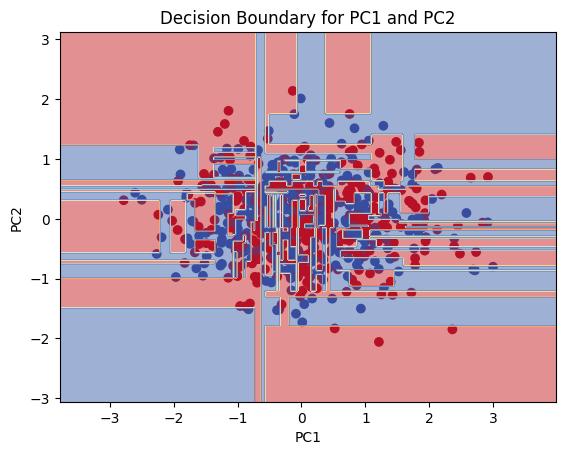

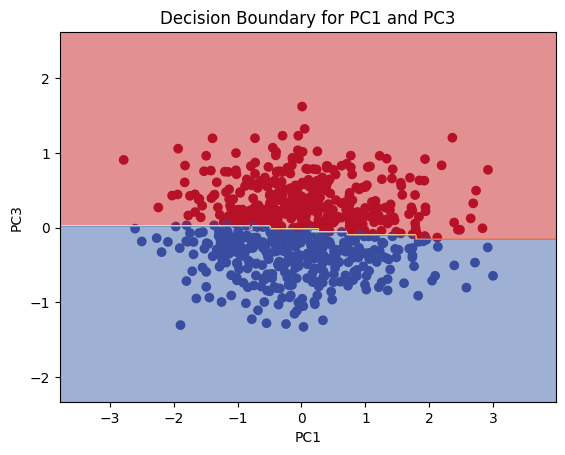

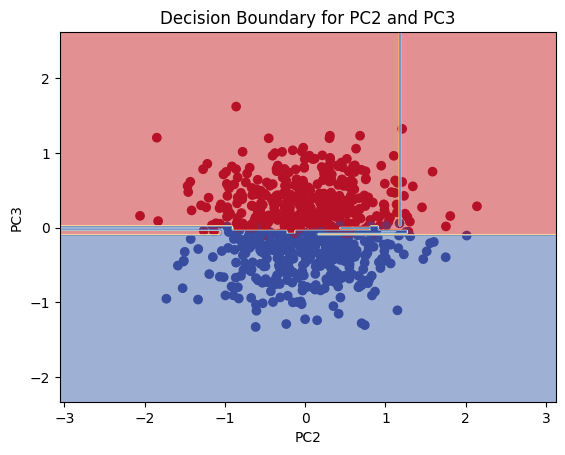

In [8]:
feature_subsets = [(0, 1), (0, 2), (1, 2)]

for subset in feature_subsets:
    X_subset = X_train[:, subset]
    clf = DecisionTreeClassifier()
    clf.fit(X_subset, Y_train)

    plt.figure()
    plt.scatter(X_subset[:, 0], X_subset[:, 1], c=Y_train, cmap=plt.cm.RdYlBu)
    plt.xlabel('PC{}'.format(subset[0]+1))
    plt.ylabel('PC{}'.format(subset[1]+1))
    plt.title('Decision Boundary for PC{} and PC{}'.format(subset[0]+1, subset[1]+1))
    plot_step = 0.02
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
    plt.show()

### Part 4

In [9]:
accuracies = {}
for subset in feature_subsets:
    X_subset = X_train[:, subset]
    clf = DecisionTreeClassifier()
    clf.fit(X_subset, Y_train)
    y_pred = clf.predict(X_test.to_numpy()[:, subset])
    accuracies[subset] = accuracy_score(Y_test.to_numpy(), y_pred)

clf_pca = DecisionTreeClassifier()
clf_pca.fit(X_train, Y_train)
y_pred_pca = clf_pca.predict(X_test)
accuracies[tuple((0,1,2))] = accuracy_score(Y_test, y_pred_pca)

for subset, acc in (accuracies.items()):
    print('Subset:', subset, 'Accuracy:', acc)

Subset: (0, 1) Accuracy: 0.43
Subset: (0, 2) Accuracy: 0.98
Subset: (1, 2) Accuracy: 0.95
Subset: (0, 1, 2) Accuracy: 0.9766666666666667


In [10]:
pca = PCA(n_components = 2)
pca_data_2 = pca.fit(dataset.drop("class",axis = 1))
pca_red = pca.transform(dataset.drop("class",axis = 1))
pca_red

array([[ 1.28913109, -1.15040316],
       [-0.0399447 ,  0.51952694],
       [-1.05811882, -0.43225254],
       ...,
       [ 0.12771626, -0.97994573],
       [-0.33268006, -0.58766933],
       [ 0.10697603,  0.17406944]])

In [11]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = tts(pca_red,dataset["class"], test_size=0.3, random_state=42)

In [12]:
clf_pca_2 = DecisionTreeClassifier()
clf_pca_2.fit(X_train_2, Y_train_2)
y_pred_pca_2 = clf_pca_2.predict(X_test_2)
print(accuracy_score(Y_test_2,y_pred_pca_2))

0.44


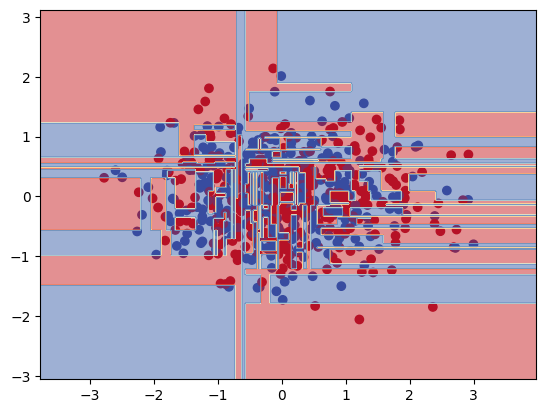

In [13]:
plt.figure()
plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=Y_train_2, cmap=plt.cm.RdYlBu)
plot_step = 0.02
x_min, x_max = X_train_2[:, 0].min() - 1, X_train_2[:, 0].max() + 1
y_min, y_max = X_train_2[:, 1].min() - 1, X_train_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                      np.arange(y_min, y_max, plot_step))
Z = clf_pca_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
plt.show()

In [14]:
dataset.drop("class",axis = 1).cov()

X1        X2        X3
X1  0.596032  0.189352  0.237672
X2  0.189352  0.625915  0.245637
X3  0.237672  0.245637  0.452506

In [15]:
for feature in feature_subsets:
  print(feature)
  dis = np.linalg.norm(X_train[:, feature] -X_train_2,ord = 'fro')
  print(dis,end = "\n")

(0, 1)
2.4278730797520023e-14
(0, 2)
21.17625840034698
(1, 2)
37.962791780882434


We can see that the distance between the same matrix components is very less (~0) for the case of feature(0,1) hence on applying n_componets = 2 and 3 we get similar accuracy for this particular case. And for the other cases we have high accuracy due to high distances.